In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [28]:
# Import necessary modules
import os
import subprocess

# Set the path to your scraper Jupyter notebook
scraper_path = '/scraper/stock-market-scraper.ipynb'

# Run the scraper Jupyter notebook
subprocess.check_call(f'jupyter nbconvert --execute --to notebook --inplace {scraper_path}'.split(), stderr=subprocess.STDOUT, stdout=subprocess.PIPE)


# Check if the scraper has completed successfully
if os.path.isfile(scraper_path.replace('.ipynb', '.html')):
    print('Scraper completed successfully')
else:
    print('Scraper failed')

CalledProcessError: Command '['jupyter', 'nbconvert', '--execute', '--to', 'notebook', '--inplace', '/scraper/stock-market-scraper.ipynb']' returned non-zero exit status 1.

In [37]:
import import_ipynb
from scraper.ipynb import *

ModuleNotFoundError: No module named 'scraper.ipynb'

In [13]:
# Load data into a pandas DataFrame
df = pd.read_csv("historic_data/csv/TCS.NS.csv")


# Drop all rows where volume is 0
df = df[df["Volume"] != 0]

# Drop rows with NaN or infinite values
df = df.replace([np.inf, -np.inf], np.nan) # replace inf values with NaN
df = df.dropna() # drop rows with NaN values



# Convert the date column to ordinal values
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].apply(lambda date: date.toordinal())

# Split the data into features (X) and target (y)
X = df.drop("Adjustedusted Close", axis=1)
y = df["Adjustedusted Close"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the Random Forest Regressor model to the training data
rfr = RandomForestRegressor(n_estimators=100, min_samples_leaf=2)
rfr.fit(X_train, y_train)


# Predict the stock prices on the testing set
y_pred = rfr.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)


C:\Users\prath\AppData\Local\Temp\ipykernel_27864\1376078611.py:16: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


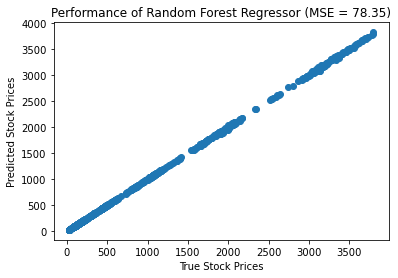

In [14]:
# Plot the true stock prices versus the predicted stock prices
plt.scatter(y_test, y_pred)
plt.xlabel("True Stock Prices")
plt.ylabel("Predicted Stock Prices")
plt.title("Performance of Random Forest Regressor (MSE = %.2f)" % mse)
plt.show()

C:\Users\prath\AppData\Local\Temp\ipykernel_27864\723619111.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tomorrow_data, ignore_index=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_27864\723619111.py:24: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


Predicted stock price for tomorrow: 2093.276768798828


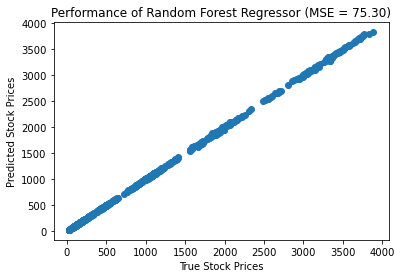

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load data into a pandas DataFrame
df = pd.read_csv("historic_data/csv/TCS.NS.csv")

# Drop all rows where volume is 0
df = df[df["Volume"] != 0]

# Drop rows with NaN or infinite values
df = df.replace([np.inf, -np.inf], np.nan) # replace inf values with NaN
df = df.dropna() # drop rows with NaN values


# Update the data with the latest data for tomorrow
tomorrow_data = [{'Date': '2023-02-08', 'Open': 800.0, 'High': 810.0, 'Low': 790.0, 'Close': 805.0, 'Adjusted Close': 805.0, 'Volume': 10000}]
df = df.append(tomorrow_data, ignore_index=True)

# Convert the date column to ordinal values
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].apply(lambda date: date.toordinal())

# Add a daily return feature to the data
df['Daily_Return'] = df['Adjusted Close'].pct_change()

# Split the data into features (X) and target (y)
X = df.drop("Adjusted Close", axis=1)
y = df["Adjusted Close"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Use the SimpleImputer class to fill in the missing values in the training data
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Define the hyperparameters for the Random Forest Regressor
param_grid = {'n_estimators': [50, 100, 200], 'min_samples_leaf': [1, 2, 4]}

# Use GridSearchCV to find the best hyperparameters for the model
rfr = RandomForestRegressor()
grid_search = GridSearchCV(rfr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Fit the best model to the training data
rfr = grid_search.best_estimator_
rfr.fit(X_train, y_train)

# Predict the stock prices for tomorrow
tomorrow_features = X_test[-1, :].reshape(1, -1)
tomorrow_price = rfr.predict(tomorrow_features)
print("Predicted stock price for tomorrow:", tomorrow_price[0])

# Predict the stock prices on the testing set
y_pred = rfr.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Plot the true stock prices versus the predicted stock prices
plt.scatter(y_test, y_pred)
plt.xlabel("True Stock Prices")
plt.ylabel("Predicted Stock Prices")
plt.title("Performance of Random Forest Regressor (MSE = %.2f)" % mse)
plt.show()



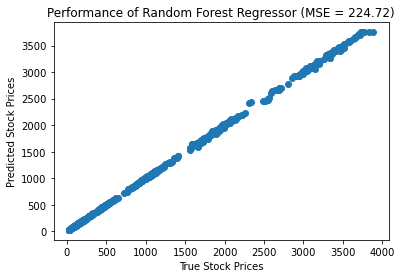

In [19]:
# Create a Random Forest Regressor with regularization
rfr = RandomForestRegressor(n_estimators=100, min_samples_leaf=10)
rfr.fit(X_train, y_train)

# Predict the stock prices on the testing set
y_pred = rfr.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Plot the true stock prices versus the predicted stock prices
plt.scatter(y_test, y_pred)
plt.xlabel("True Stock Prices")
plt.ylabel("Predicted Stock Prices")
plt.title("Performance of Random Forest Regressor (MSE = %.2f)" % mse)
plt.show()


In [20]:
# Use GridSearchCV to find the best hyperparameters for the model
rfr = RandomForestRegressor()
grid_search = GridSearchCV(rfr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Fit the best model to the training data
rfr = grid_search.best_estimator_
rfr.fit(X_train, y_train)


Best hyperparameters: {'min_samples_leaf': 1, 'n_estimators': 200}


RandomForestRegressor(n_estimators=200)

C:\Users\prath\AppData\Local\Temp\ipykernel_27864\552818972.py:20: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


Average MSE:  8839.291603851327


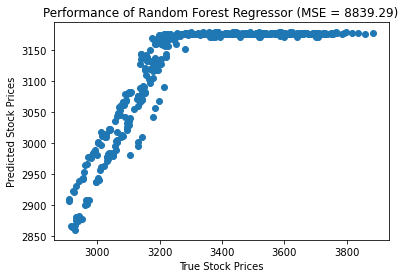

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

# Load data into a pandas DataFrame
# Load data into a pandas DataFrame
df = pd.read_csv("historic_data/csv/TCS.NS.csv")

# Drop all rows where volume is 0
df = df[df["Volume"] != 0]

# Drop rows with NaN or infinite values
df = df.replace([np.inf, -np.inf], np.nan) # replace inf values with NaN
df = df.dropna() # drop rows with NaN values


# Convert the date column to ordinal values
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].apply(lambda date: date.toordinal())

# Split the data into features (X) and target (y)
X = df.drop("Adjusted Close", axis=1)
y = df["Adjusted Close"]

kf = KFold(n_splits=10)

mse_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the Random Forest Regressor model to the training data
    rfr = RandomForestRegressor(n_estimators=100, min_samples_leaf=1)
    rfr.fit(X_train, y_train)

    # Predict the stock prices on the testing set
    y_pred = rfr.predict(X_test)

    # Calculate the mean squared error of the predictions
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

average_mse = sum(mse_scores) / len(mse_scores)
print("Average MSE: ", average_mse)

# Plot the true stock prices versus the predicted stock prices
plt.scatter(y_test, y_pred)
plt.xlabel("True Stock Prices")
plt.ylabel("Predicted Stock Prices")
plt.title("Performance of Random Forest Regressor (MSE = %.2f)" % average_mse)
plt.show()
